In [52]:
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [53]:
#Loading the data set
df = pd.read_csv("Hitters.csv")
len(df.columns)

20

In [54]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


#### Dataset Description:
**Variable** | **__ Description__** |** Type**
---|---|---
AtBat |Number of times at bat in 1986|Integer
Hits|Number of hits in 1986|Integer
HmRun |Number of home runs|Integer
RBI|Number of runs batted|Integer
Walks|Number of walks in 1986|Integer
Years|Number of years in the major leagues|Integer
CAtBat |Number of times at bat during his career |Integer
CHits |Number of hits during his career |Integer
CHmRun |Number of home runs during his career |Integer
CRuns |Number of runs during his career |Integer
CRBI |Number of runs batted in during his career |Integer
CWalks |Number of walks during his career League|Integer
League|A factor with levels A and N indicating player’s league |Qualitiative
Division|A factor with levels E and W indicating player’s division at the end of 1986|Qualitative
PutOuts |Number of put outs|Integer
Assists |Number of assists|Integer
Errors |Number of Errors|Integer
Salary |1987 Salary|Integer
NewLeague |A factor with levels A and N indicating player’s league|Qualitative



- n (number of records =322
- p (Columns = 20)
- Dependent varaiable - Salary




In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    321 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


In [56]:
# Few of the observations have NULL values for Salary
# Dropping the null values
df = df.dropna(axis = 0)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 1 to 320
Data columns (total 20 columns):
AtBat        262 non-null int64
Hits         262 non-null int64
HmRun        262 non-null int64
Runs         262 non-null int64
RBI          262 non-null int64
Walks        262 non-null int64
Years        262 non-null int64
CAtBat       262 non-null int64
CHits        262 non-null int64
CHmRun       262 non-null int64
CRuns        262 non-null int64
CRBI         262 non-null int64
CWalks       262 non-null int64
League       262 non-null object
Division     262 non-null object
PutOuts      262 non-null int64
Assists      262 non-null int64
Errors       262 non-null int64
Salary       262 non-null float64
NewLeague    262 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.0+ KB


In [58]:
X = df.drop(['Salary'],axis = 1)

In [59]:
y = df.Salary

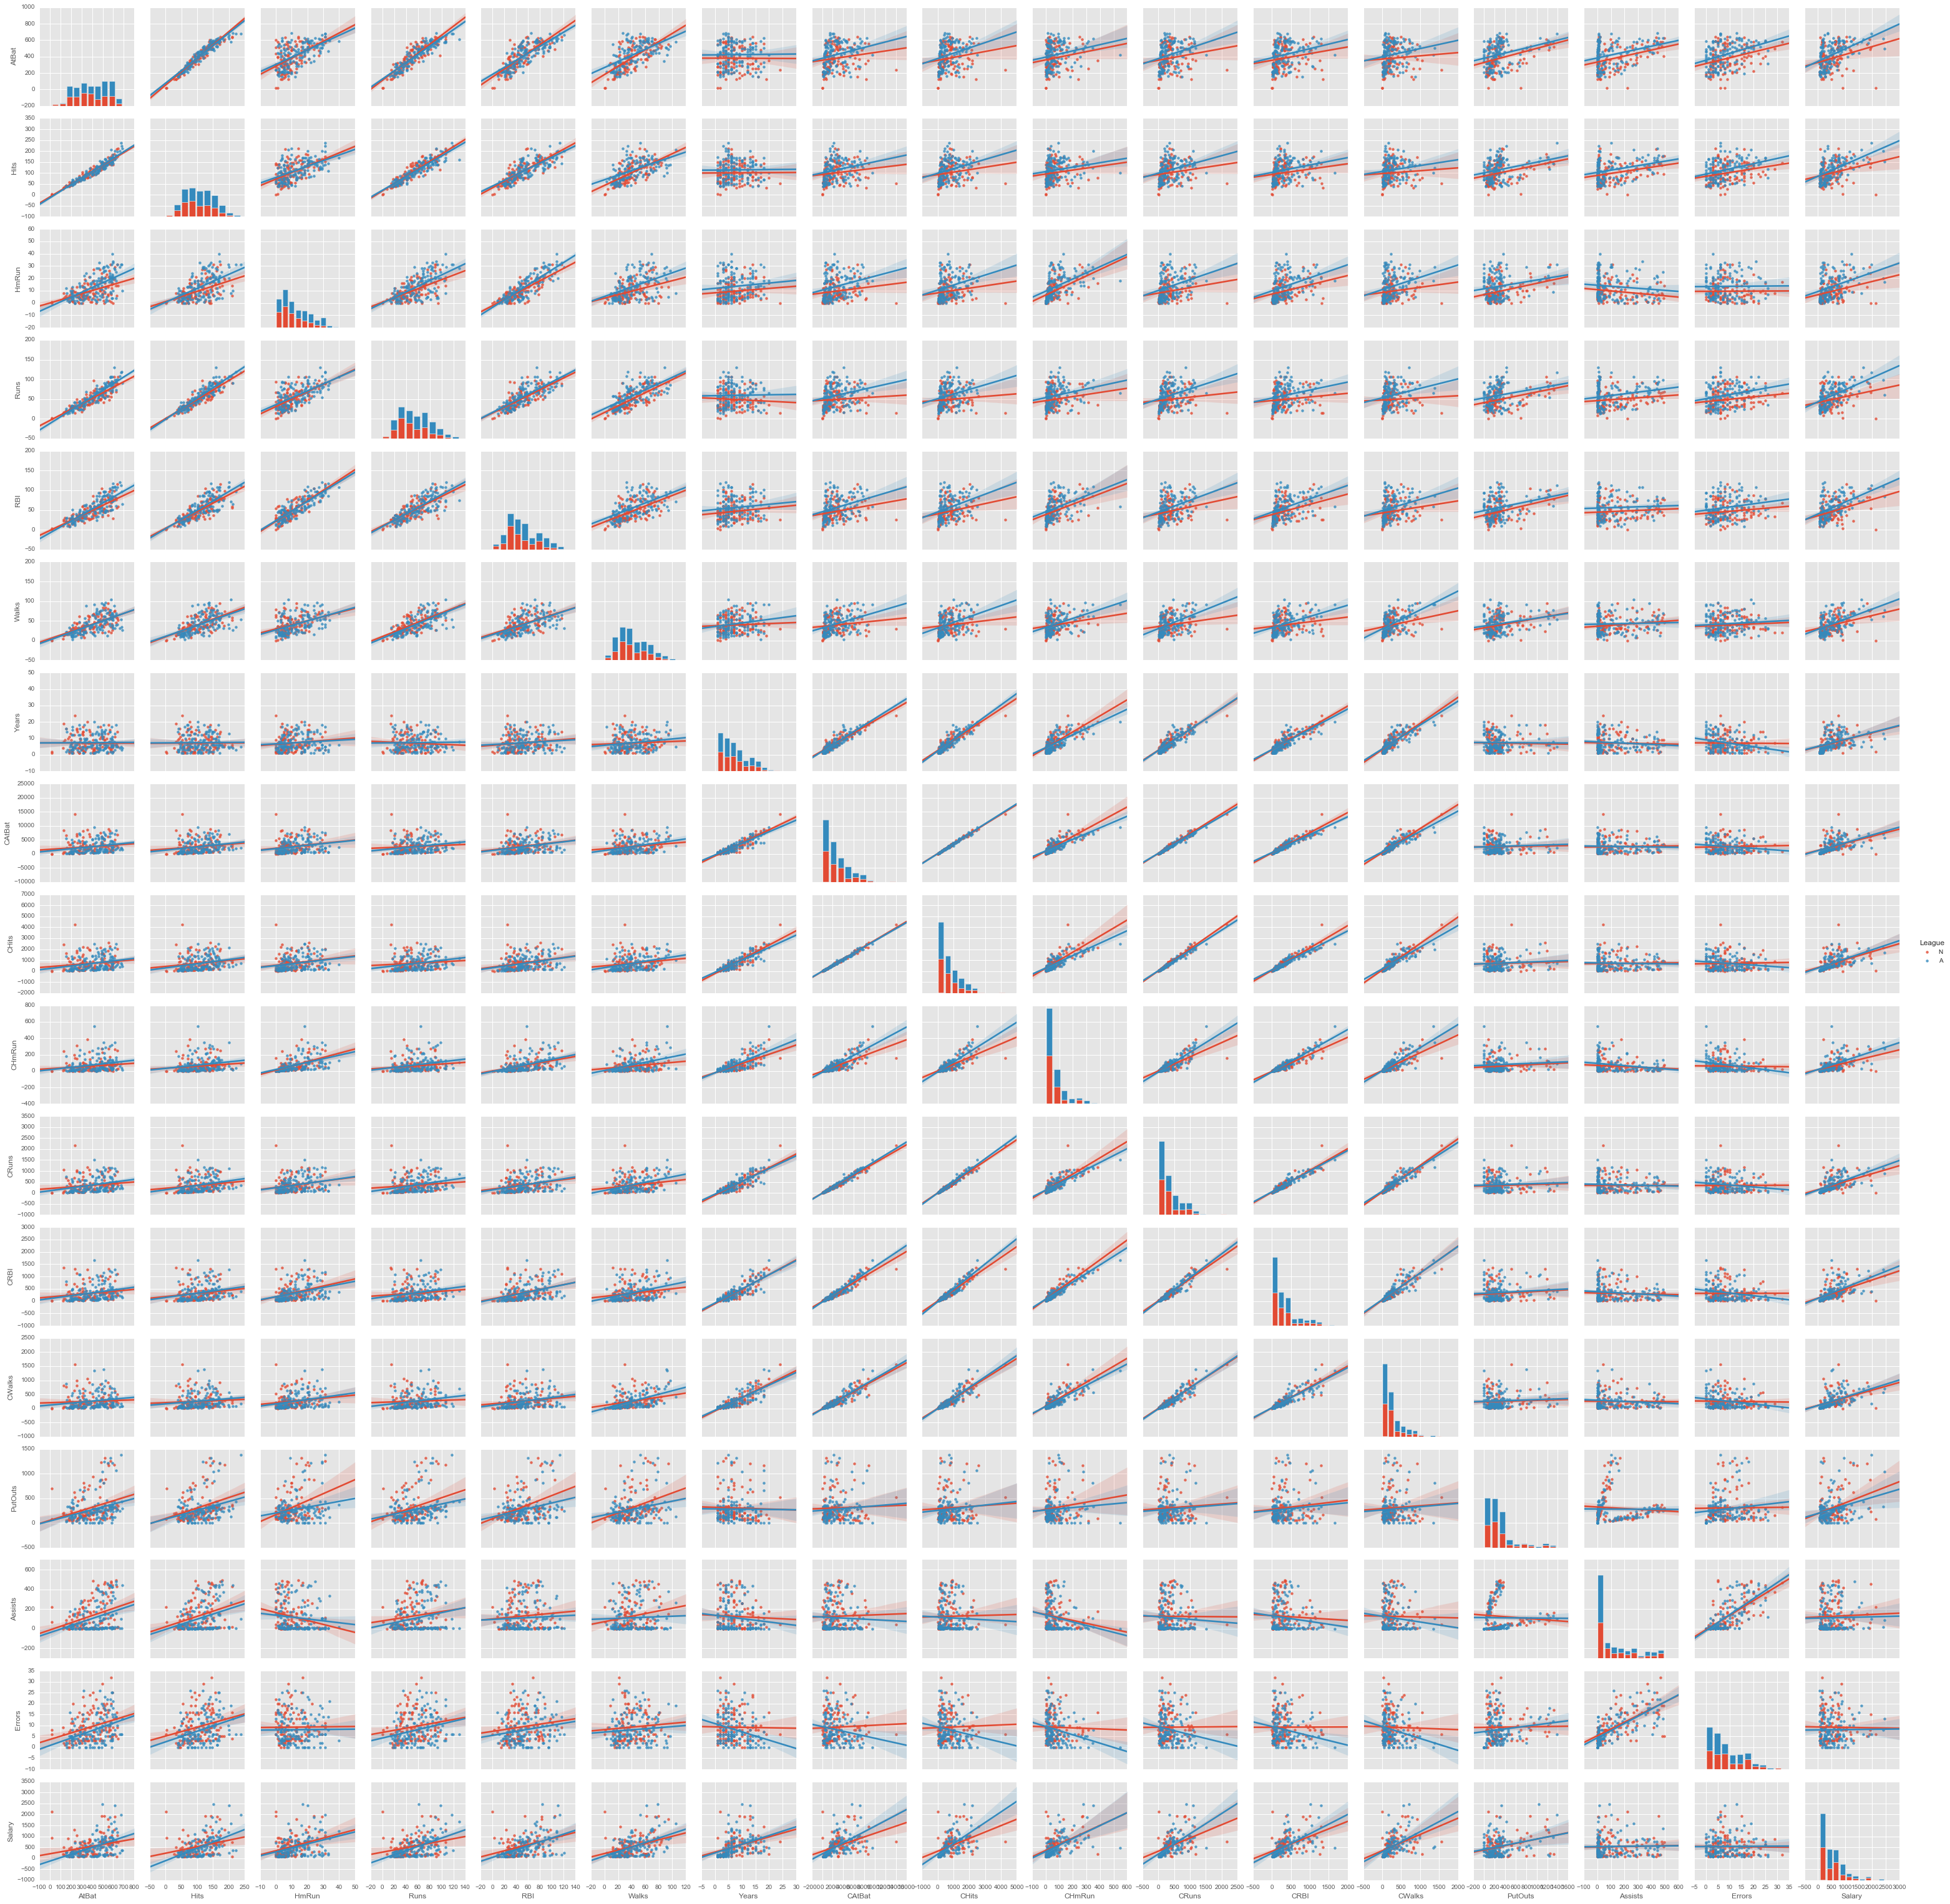

In [60]:
sns.pairplot( data =df, hue = 'League',kind = 'reg')

In [61]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.963725,0.559526,0.900097,0.801520,0.630346,0.008223,0.202648,0.220185,0.216328,0.231640,0.221925,0.133790,0.308645,0.348807,0.332559,0.391268
Hits,0.963725,1.000000,0.534244,0.910669,0.793021,0.592171,0.014606,0.202595,0.231031,0.192670,0.233851,0.219754,0.123647,0.298664,0.309648,0.285777,0.435713
HmRun,0.559526,0.534244,1.000000,0.633105,0.849058,0.440178,0.114520,0.219036,0.219373,0.492278,0.260604,0.350017,0.227174,0.251539,-0.162731,-0.010730,0.344966
Runs,0.900097,0.910669,0.633105,1.000000,0.780920,0.699879,-0.014581,0.169085,0.188280,0.231733,0.234704,0.202358,0.164082,0.270245,0.182383,0.195989,0.417879
RBI,0.801520,0.793021,0.849058,0.780920,1.000000,0.569316,0.130690,0.279781,0.294166,0.441924,0.309587,0.387935,0.233610,0.312684,0.062110,0.149446,0.451586
Walks,0.630346,0.592171,0.440178,0.699879,0.569316,1.000000,0.136377,0.271824,0.273606,0.349028,0.336352,0.312978,0.429244,0.281815,0.101275,0.080571,0.446795
Years,0.008223,0.014606,0.114520,-0.014581,0.130690,0.136377,1.000000,0.915517,0.897732,0.724917,0.876582,0.864559,0.838604,-0.021286,-0.082980,-0.154403,0.398886
CAtBat,0.202648,0.202595,0.219036,0.169085,0.279781,0.271824,0.915517,1.000000,0.995079,0.805323,0.982799,0.952201,0.908563,0.051926,-0.004930,-0.067503,0.524292
CHits,0.220185,0.231031,0.219373,0.188280,0.294166,0.273606,0.897732,0.995079,1.000000,0.791020,0.984483,0.948791,0.893108,0.065712,-0.009744,-0.064607,0.546897
CHmRun,0.216328,0.192670,0.492278,0.231733,0.441924,0.349028,0.724917,0.805323,0.791020,1.000000,0.830759,0.928470,0.811157,0.094662,-0.190645,-0.167221,0.528114


Observations -
- all the Career related data ha a high degree of collinearity
- Reg plts shows that the best fit line is Horizontal for Assist and Error and hence there seems to be no relationship 
 


In [87]:
train_X,test_X,train_y,test_y = cross_validation.train_test_split(X,y ,test_size = .2 ,random_state =0)
# an empty data frame to hold the values of the Model
df_eval = pd.DataFrame({'k':np.nan,'Param':np.nan,'train_score':np.nan,'cv_score':np.nan},index=[0])

In [89]:
# 3 of the columns - League ,Division and NewLeague are categorical with non numeric labels
#Using label encoder to transform string categorical features into numeric
le = preprocessing.LabelEncoder()
temp = le.fit_transform(train_X.League)

le_1 = le = preprocessing.LabelEncoder()
temp_Division = le.fit_transform(train_X.Division)

le_2 = le = preprocessing.LabelEncoder()
temp_NewLeague = le.fit_transform(train_X.NewLeague)


train_X.League = temp
train_X.Division = temp_Division
train_X.NewLeague = temp_NewLeague


In [90]:
# The code below executes forward selection on the model to select the best features 
from sklearn.feature_selection import f_regression

for i in range(1,len(X.columns)):
    
    feature_list = []  # Empty list to hold the features
    model_k = feature_selection.SelectKBest(score_func= f_regression , k=i)
    X_new = model_k.fit_transform(train_X , train_y) # This is the new feature_space
    
    # Extracting the indices for the selected features
    feature_index = model_k.get_support(indices = True)
    for j in range(0,i):
        feature_list.append(train_X.columns[feature_index[j]])
        feature_list.append(',')
        
        
    # Building a Regresssion model on the selected feature
    model_temp = linear_model.LinearRegression().fit(X_new , train_y)
    train_score = model_temp.score(X_new , train_y)
    cv_score = cross_validation.cross_val_score(model_temp , X_new , train_y ,cv = 10).mean()
    
    #populating the values in the Data Fream
    df_eval.loc[i-1,'train_score'] = train_score
    df_eval.loc[i-1,'cv_score'] = cv_score
    df_eval.loc[i-1,'k'] = i
    df_eval.loc[i-1 , 'Param'] = " ".join(str(x) for x in feature_list)
    
    
    
    
    

In [91]:
df_eval

,Param,cv_score,k,train_score
0,"CRBI ,",0.120043,1.0,0.239964
1,"CRuns , CRBI ,",0.106744,2.0,0.244802
2,"Runs , CRuns , CRBI ,",0.290215,3.0,0.400508
3,"Hits , Runs , CRuns , CRBI ,",0.285200,4.0,0.409184
4,"Hits , Runs , CHits , CRuns , CRBI ,",0.258064,5.0,0.409195
5,"Hits , Runs , RBI , CHits , CRuns , CRBI ,",0.242496,6.0,0.409331
6,"Hits , Runs , RBI , CHits , CHmRun , CRuns , C...",0.228233,7.0,0.409957
7,"Hits , Runs , RBI , Walks , CHits , CHmRun , C...",0.213995,8.0,0.418519
8,"Hits , Runs , RBI , Walks , CAtBat , CHits , C...",0.208749,9.0,0.467597
9,"AtBat , Hits , Runs , RBI , Walks , CAtBat , C...",0.196778,10.0,0.480855


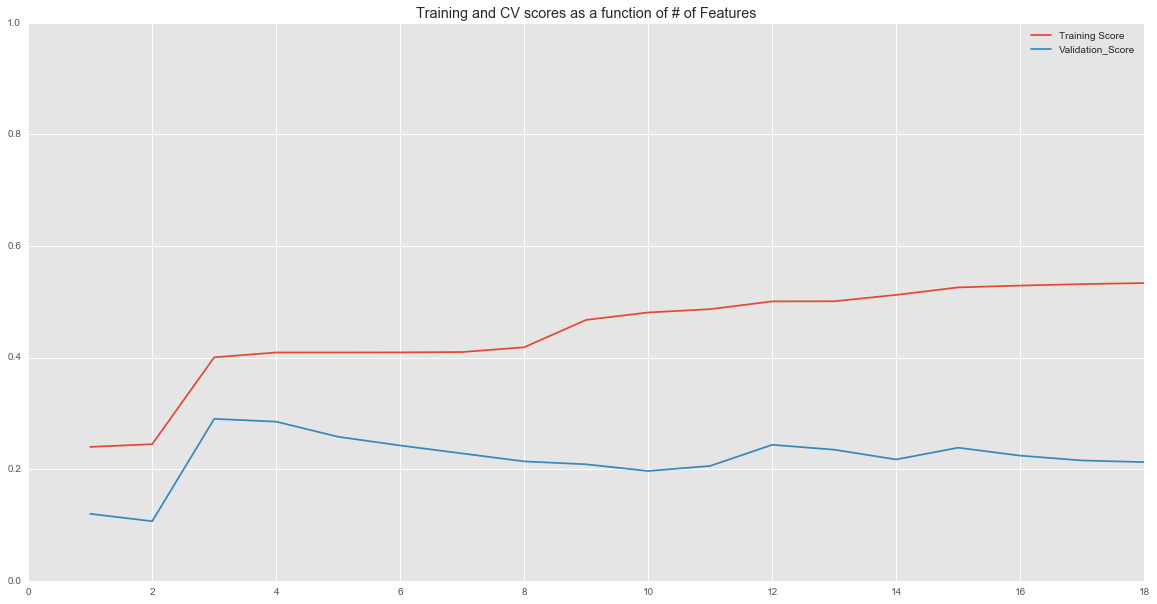

In [98]:
plt.figure(figsize=(20,10))
plt.ylim([0,1])
plt.plot(df_eval.k ,df_eval.train_score,label='Training Score' )
plt.plot(df_eval.k ,df_eval.cv_score ,label = 'Validation_Score')
plt.legend(loc='best')
plt.title('Training and CV scores as a function of # of Features')

### Conclusion:
- The best linear Model has 3 features
- As expected the training data's score increases as more variables are added to the model. This does not however, increases the CV score
- Runs , CRuns , CRBI are the best 3 features with a R_2 value of .3

### Backward selection

In [104]:
df_bward_eval = pd.DataFrame({'k':np.nan,'Param':np.nan,'train_score':np.nan,'cv_score':np.nan},index=[0])

In [106]:
from sklearn.feature_selection import RFE
for i in range(1,len(train_X.columns)):
    feature_list = [] # Emplty list to hold the features that have been selected
    # defining an instance of RFE(recursive Feature Estimator)
    estimator = linear_model.LinearRegression()
    model = RFE(estimator , i, step =1)
    
    X_new = model.fit_transform(train_X , train_y)
    model_temp = linear_model.LinearRegression().fit(X_new,train_y)
    train_score = model_temp.score(X_new,train_y)
    cv_score = cross_validation.cross_val_score(model_temp,X_new,train_y,cv=10).mean()
    
    # populating the list with the feature selected
    feature_index = model.get_support(indices = True)
    for j in range(0,i):
        feature_list.append(train_X.columns[feature_index[j]])
        feature_list.append(',')
        
    # updating the Results in a Data Frame:
    
    df_bward_eval.loc[i-1,'train_score'] = train_score
    df_bward_eval.loc[i-1,'cv_score'] = cv_score
    df_bward_eval.loc[i-1,'k'] = i
    df_bward_eval.loc[i-1 , 'Param'] = " ".join(str(x) for x in feature_list)
    
        

In [109]:
df_bward_eval

,Param,cv_score,k,train_score
0,"Division ,",-0.190071,1.0,0.024533
1,"Years , Division ,",-0.065551,2.0,0.129054
2,"Years , Division , NewLeague ,",-0.074255,3.0,0.129109
3,"HmRun , Years , Division , NewLeague ,",0.127308,4.0,0.277010
4,"HmRun , Years , League , Division , NewLeague ,",0.123504,5.0,0.277082
5,"HmRun , Walks , Years , League , Division , Ne...",0.155835,6.0,0.352074
6,"Hits , HmRun , Walks , Years , League , Divisi...",0.231409,7.0,0.399162
7,"Hits , HmRun , RBI , Walks , Years , League , ...",0.227599,8.0,0.402414
8,"AtBat , Hits , HmRun , RBI , Walks , Years , L...",0.192654,9.0,0.438086
9,"AtBat , Hits , HmRun , Runs , RBI , Walks , Ye...",0.186025,10.0,0.438616


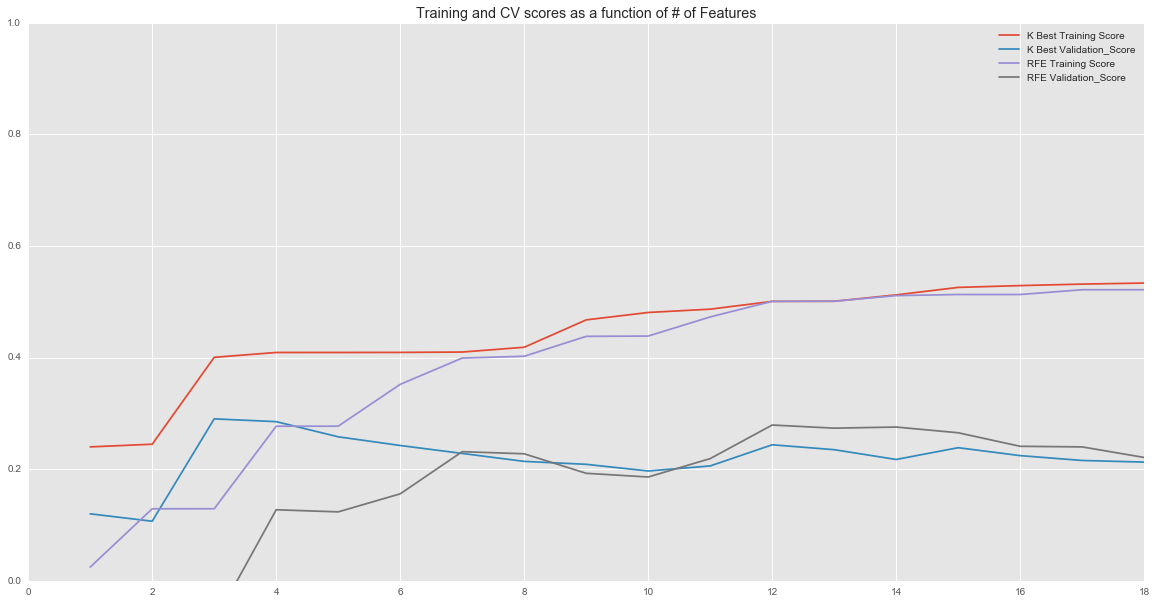

In [110]:
plt.figure(figsize=(20,10))
plt.ylim([0,1])
plt.plot(df_eval.k ,df_eval.train_score,label='K Best Training Score' )
plt.plot(df_eval.k ,df_eval.cv_score ,label = 'K Best Validation_Score')

plt.plot(df_bward_eval.k ,df_bward_eval.train_score,label='RFE Training Score' )
plt.plot(df_bward_eval.k ,df_bward_eval.cv_score ,label = 'RFE Validation_Score')


plt.legend(loc='best')

plt.title('Training and CV scores as a function of # of Features')

Conclusion:
- The 3 variable model seems to be the best which has the best score 